In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import PIL
import PIL.Image
from collections import namedtuple
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Image

## 画像の読み込み

In [2]:
#画像を読み込み
img = PIL.Image.open("sa-val.jpg")
#img = PIL.Image.open("color.jpg")

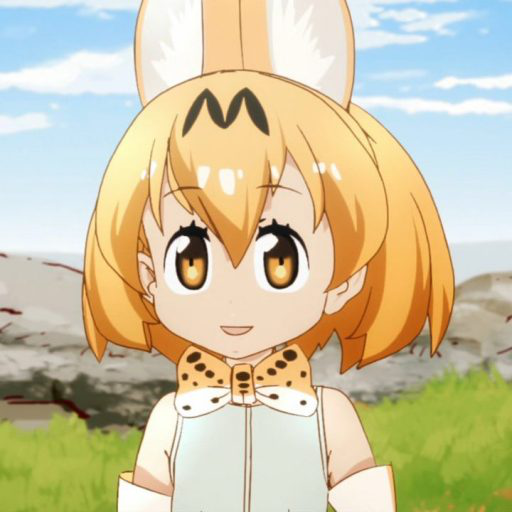

In [3]:
img

In [4]:
# 画像のサイズを取得
width, height = img.size

In [5]:
height, width

(512, 512)

In [6]:
# 特徴ベクトルを取得
# 色ベクトルと位置ベクトルを持った辞書を用意
v = []
color_dic = {}
for y in range(height):
    for x in range(width):
        r,g,b = img.getpixel((x,y))
        v.append(np.array([r,g,b]))
        try:# 辞書に登録されていれば
            pos_list = color_dic[(r,g,b)]
            pos_list.append((x,y))
            color_dic[(r,g,b)] = pos_list
        except:# 辞書に登録されていなければ
            color_dic[(r,g,b)] = [(x,y)]

In [7]:
v = np.array(v)

In [8]:
v

array([[225, 233, 246],
       [225, 233, 246],
       [225, 233, 246],
       ..., 
       [116, 142,  33],
       [116, 142,  33],
       [117, 143,  34]])

## 特徴空間をプロット

In [9]:
# 初期状態をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(v[:,0],v[:,1],v[:,2])

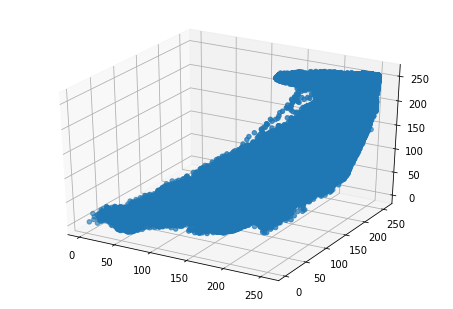

In [10]:
plt.show()

## クラスタリング

In [11]:
# クラスタの個数
num_cluster = 3

### k-means法

In [12]:
# モデルの宣言
km = KMeans(n_clusters=num_cluster,#クラスタ数
            init='random',#セントロイドの初期値をランダムに選択
            n_init=10,#異なるセントロイドの初期値を用いたk-meansアルゴリズム
            max_iter=100,#k-meansアルゴリズムの内部イテレーション回数
            tol=1e-04,#収束と判定するための相対的な許容誤差
            random_state=0#セントロイドの初期値に用いる乱数生成器の状態
            )

In [13]:
# 学習
km.fit(v)#y_kmにクラスタの番号が保存される

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [14]:
# 特徴ベクトル
v

array([[225, 233, 246],
       [225, 233, 246],
       [225, 233, 246],
       ..., 
       [116, 142,  33],
       [116, 142,  33],
       [117, 143,  34]])

In [15]:
# クラスタの番号
km.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [16]:
# クラスタの個数(=num_cluster)
np.unique(km.labels_)

array([0, 1, 2], dtype=int32)

In [17]:
# セントロイド
km.cluster_centers_

array([[ 154.15264468,  135.86016618,   61.24566457],
       [ 228.51493534,  195.72177795,  143.55595863],
       [ 221.79305183,  231.63292097,  232.32493756]])

## クラスタリング後の状態をプロット

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")

In [19]:
def vec2color(color):
    r,g,b = color
    color = [hex(int(_))[2:] for _ in color]
    color = [_.zfill(2) for _ in color]
    return "#"+color[0]+color[1]+color[2]

In [20]:
# vec2colorの例
color = (27,2,113)
vec2color(color)

'#1b0271'

In [21]:
# グラフを作る
# 各ラベルに対して
for i in range(num_cluster):
    centroid = km.cluster_centers_[i]#各クラスタのcentroid
    tmp = []#各クラスタに属す特徴ベクトル
    # 特徴ベクトルの数だけ
    for j in range(len(v)):
        # ラベルが同じだったら
        if i==km.labels_[j]:
            tmp.append(v[j])
    tmp = np.array(tmp)
    ax.scatter(tmp[:,0],tmp[:,1],tmp[:,2],c=vec2color(centroid))

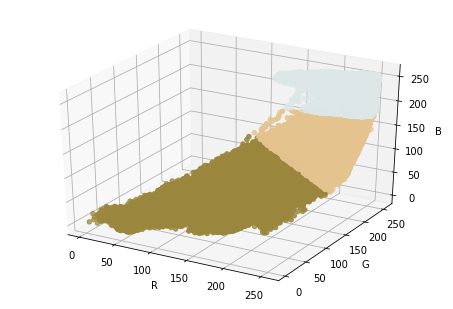

In [22]:
plt.show()

In [23]:
# グラフを保存
file_name = "img/glaph-{}.png".format(num_cluster)
plt.savefig(file_name)

## 画像変換

In [24]:
new_img = PIL.Image.new("RGB",(width,height))

In [25]:
for color,pos_list in color_dic.items():
    #その色がどのクラスタに属するか
    cluster_label = km.predict(np.array(color).reshape(1,-1)) # クラスラベルを取得
    centroid = km.cluster_centers_[cluster_label] # その色が属するクラスタのセントロイド
    centroid = tuple([int(n) for n in centroid[0]])
    for pos in pos_list:
        new_img.putpixel(pos,centroid)

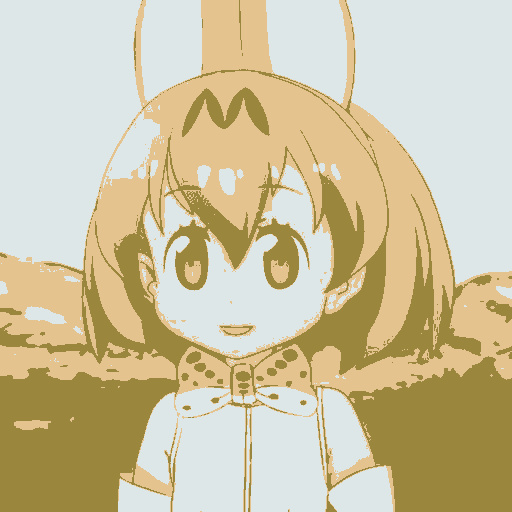

In [26]:
new_img

## 画像保存

In [27]:
#画像を出力
file_name = "img/res_"+str(num_cluster)
#cv2.imwrite(file_name+".jpg",img)
new_img.save("{}-means-img.jpg".format(num_cluster))